In [2]:
import scanpy as sc
import scvi
import anndata as ad
from scvi.model.utils import mde
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
from scvi.autotune import ModelTuner
from ray import tune
import ray
seed = 9999
np.random.seed(seed)

In [3]:
adata = sc.read("T.h5ad")

In [4]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,condition,replicate,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.08,seurat_clusters,SCT_snn_res.0.07,batch,SCT_snn_res.0.06,SCT_snn_res.0.1,anchor_pred,celltype_wide,cell_type,SCT_snn_res.0.3
ctl_1_AAACCCAAGCCTCATA-1,NASH_HCC_RASV,16496.0,4806,ctl,1,2.764306,6135.0,2748,4,1,3,ctl_1,2,4,EC_01_CLEC4A,EC,T,1
ctl_1_AAACCCAAGGTCGACA-1,NASH_HCC_RASV,8313.0,2788,ctl,1,3.969686,6917.0,2769,7,3,3,ctl_1,2,7,CD4T_06_PLCG2,CD4T,T,3
ctl_1_AAACCCACATGTCGTA-1,NASH_HCC_RASV,8198.0,2931,ctl,1,2.976336,6964.0,2915,7,3,3,ctl_1,2,7,CD8T_11_SLC4A10,CD8T,T,3
ctl_1_AAACGAATCCCAGCGA-1,NASH_HCC_RASV,8093.0,2890,ctl,1,3.299147,6898.0,2877,4,7,3,ctl_1,2,4,B_02_MS4A1_CD83,B,T,7
ctl_1_AAACGCTCATACAGGG-1,NASH_HCC_RASV,8671.0,2625,ctl,1,2.883174,6886.0,2612,7,3,3,ctl_1,2,7,CD4T_06_PLCG2,CD4T,T,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
end_3_TTTGTTGAGACCAGCA-1,NASH_HCC_RASV,15427.0,4134,end,3,2.048357,6657.0,2627,4,6,3,end_3,2,4,CD8T_13_STMN1,CD8T,T,6
end_3_TTTGTTGAGGCTGAAC-1,NASH_HCC_RASV,11380.0,3382,end,3,2.820738,7329.0,3288,4,0,3,end_3,2,4,CD8T_10_PDCD1,CD8T,T,0
end_3_TTTGTTGAGTCACTCA-1,NASH_HCC_RASV,6648.0,2635,end,3,3.098676,6620.0,2619,4,0,3,end_3,2,4,CD8T_07_PLCG2,CD8T,T,0
end_3_TTTGTTGTCGCAGTCG-1,NASH_HCC_RASV,5445.0,2612,end,3,11.533517,5941.0,2598,4,6,1,end_3,2,4,CD8T_13_STMN1,CD8T,T,6


In [7]:
adata.layers["counts"] = adata.X.copy()
adata.X.shape

(18649, 24461)

In [13]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch", continuous_covariate_keys =  ["percent.mt","nCount_RNA"])

In [14]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")

In [16]:
model.train(max_epochs=200, early_stopping = True)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|███████████████████| 200/200 [06:43<00:00,  2.00s/it, v_num=1, train_loss_step=8.64e+3, train_loss_epoch=7.72e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|███████████████████| 200/200 [06:43<00:00,  2.02s/it, v_num=1, train_loss_step=8.64e+3, train_loss_epoch=7.72e+3]


In [ ]:
model.save('all_genes_tuned_modelv3')

In [17]:
latent = model.get_latent_representation()
latent.shape

(18649, 30)

In [18]:
adata.obsm["X_scvi"] = latent
adata.layers["scvi_normalized"] = model.get_normalized_expression(library_size = 1e4)

In [19]:
sc.pp.neighbors(adata, use_rep = "X_scvi",)
sc.tl.umap(adata, random_state=seed)

In [39]:
sc.tl.leiden(adata, resolution = 0.3, random_state=seed, flavor= "igraph", n_iterations=2, directed = False)#, n_iterations=2, directed= False

In [40]:
adata.obsm["X_mde"] = mde(adata.obsm["X_scvi"])

INFO     Using cuda:0 for `pymde.preserve_neighbors`.                                                              


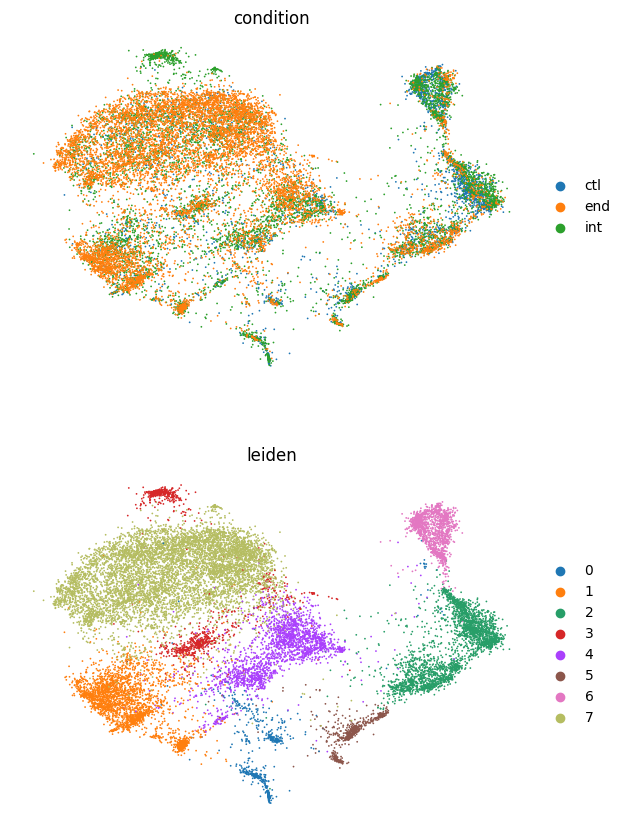

In [41]:
sc.pl.embedding(
    adata,
    basis="X_mde",
    color=["condition", "leiden"],
    frameon=False,
    ncols=1,
    save='mde_cell_types0_06_allgenes.pdf'
)

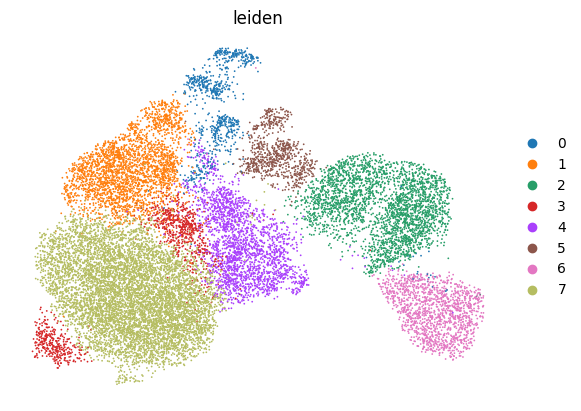

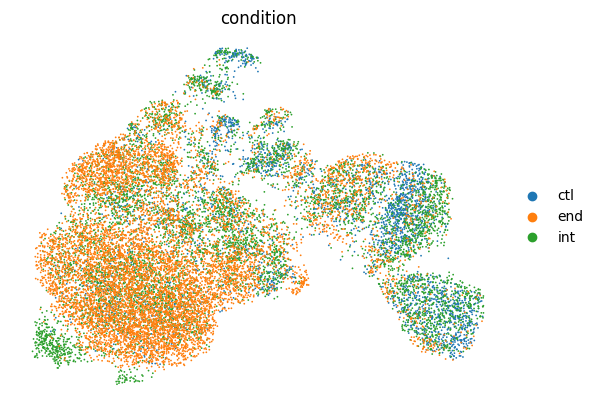

In [42]:
sc.pl.umap(adata, color = ["leiden"], frameon = False , save= "umap_cell_type.pdf")
sc.pl.umap(adata, color = ["condition"], frameon = False , save= "umap_condition.pdf")

In [43]:
df = model.differential_expression(groupby = 'leiden')
markers = {}
for c in adata.obs.leiden.cat.categories:
    cell_df = df.loc[df.group1 == c]
    markers[c] = cell_df.index.tolist()[:100]

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:59<00:00,  7.40s/it]


In [44]:
import pandas as pd


markers_df = pd.DataFrame.from_dict(markers, orient='index').transpose()

markers_df.columns = [f"Cluster_{col}" for col in markers_df.columns]
markers_df.index = [f"Marker_{i+1}" for i in markers_df.index]
print(markers_df.head())


         Cluster_0 Cluster_1      Cluster_2  Cluster_3 Cluster_4 Cluster_5  \
Marker_1   Dennd5b   Tnfrsf4          Syde2      Gm550  Rap1gap2     Ffar2   
Marker_2     Mef2c     Dclk1        Gm50397      Cdca3   Gm47392   Slc35f3   
Marker_3    Diras2      Ccn4  1700062C10Rik  Hist1h2af     Dapl1     Rbm24   
Marker_4   Rasgrp3      Ocln        Gm49180  Hist1h2ah      Sell    Zbtb16   
Marker_5    Zfp608      Ebi3         Ttc39c   Hist1h3c     S1pr5    Rab27b   

         Cluster_6      Cluster_7  
Marker_1   St8sia6  4931431B13Rik  
Marker_2     Klrc1        Gm42161  
Marker_3    Chst11       Olfr1511  
Marker_4    Srgap3           Faxc  
Marker_5     Il2rb     AC149091.1  


In [46]:
markers_df.to_excel('T_markers.xlsx', index=True)